# Building different architectures 

In this notebook we are going to work on multiple datasets, build multiple neural networks using PyTorch to get a feeling of our workflow,the same will be done with Keras .

In this notebook we are going to build multiple models,logistic regression and a feed forward network ,using PyTorch and then training and evaluating each of these networks on 3 different datasets .



In [1]:
#importing our tools
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable #autograd main component a Variable Class
from sklearn.datasets import load_iris
iris = load_iris()



In [2]:
def load_data(dataset):
    #let's create our dataset into a training and testing one
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import StandardScaler
    import torch.utils.data

    X_ = dataset.data
    Y_ = dataset.target
    X_train,X_test,Y_train,Y_test = train_test_split(X_,Y_,random_state=42,test_size=0.2)
    train = torch.utils.data.TensorDataset(torch.from_numpy(X_train.astype('float32')),torch.from_numpy(Y_train.astype('float32')))
    train_loader = torch.utils.data.DataLoader(train,batch_size=10,shuffle=False)
    test = torch.utils.data.TensorDataset(torch.from_numpy(X_test),torch.from_numpy(Y_test))
    test_loader = torch.utils.data.DataLoader(test,batch_size=10,shuffle=False)
    return train_loader,test_loader

In [3]:

input_size = 4
num_classes = 3
num_epochs = 10
learning_rate = 0.01
batch_size = 10
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)
train_loader,test_loader = load_data(iris)
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [4]:
# Training the Model
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = Variable(inputs)
        labels = Variable(labels.long())
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

# Test the Model
correct = 0
total = 0
for inputs, labels in test_loader:
    inputs = Variable(inputs)
    outputs = model(inputs.float())
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the iris dataset: %d %%' % (100 * correct / total))


Accuracy of the model on the iris dataset: 86 %


### Building a FNN using Keras simple API

Keras uses a modular way to build you network in other words you initiate your model and stack layers on it the way you picture it in a paper representation or following a description

In [5]:
import keras

Using TensorFlow backend.


In [17]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adagrad,RMSprop,SGD
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
"""
    Let's build a Fully Connected Neural Network with Drop out to train on the MNIST dataset
"""
from keras.datasets import mnist
from keras.utils import np_utils

In [59]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()
"""
    Data preprocessing on mnist
"""

#reshape the vectors and take the values as float32 for compatibility
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# creating a validation set the one that shows the real performance of the network
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.2)

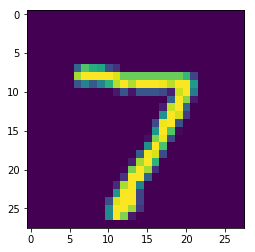

In [60]:
"""
    You can view the images in the dataset by converting them from flattened vectors using matplotlib
"""

plt.imshow(X_test[0].reshape(28,28))

In [61]:
# building the models
"""
    Our model will resemble this design (keras shows us some ASCII ARt depicting the model so l33t)
        Input --> Layer 1 --> Activation + Droptout --> Layer 2 ... --> Layer 3 Softmax (to emit class probabilites 
        sing we are dealing with a multi class classification problem)

"""

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

#### Some notes

Building networks is like a craft you tune the parameters you can tune like regularization trough dropout for example ,play with activation functions or speed up the training by using a different optimizer,adding extra layers,pretraining ... It's really a fascinating engineering process beyond the math behind it ,the model we just built will perform badly and we will tune it to improve it further more

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [65]:
"""
    Network History is like a memory of the training process it store the values of loss and accuracy after each
    epoch to help us visualize the training process and evaluate the learning part in a visual manner .
    It's a keras.callbacks.history object
"""

network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=10, verbose=1, validation_data=(X_val, Y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s - loss: 2.1986 - acc: 0.2341 - val_loss: 2.0685 - val_acc: 0.4551
Epoch 2/10
48000/48000 [==============================] - 7s - loss: 1.9335 - acc: 0.6086 - val_loss: 1.8031 - val_acc: 0.6924
Epoch 3/10
48000/48000 [==============================] - 10s - loss: 1.6605 - acc: 0.7316 - val_loss: 1.5304 - val_acc: 0.7522
Epoch 4/10
48000/48000 [==============================] - 10s - loss: 1.3946 - acc: 0.7728 - val_loss: 1.2815 - val_acc: 0.7797
Epoch 5/10
48000/48000 [==============================] - 9s - loss: 1.1681 - acc: 0.7969 - val_loss: 1.0825 - val_acc: 0.7996
Epoch 6/10
48000/48000 [==============================] - 9s - loss: 0.9945 - acc: 0.8130 - val_loss: 0.9351 - val_acc: 0.8137
Epoch 7/10
48000/48000 [==============================] - 10s - loss: 0.8670 - acc: 0.8268 - val_loss: 0.8272 - val_acc: 0.8268
Epoch 8/10
48000/48000 [==============================] - 

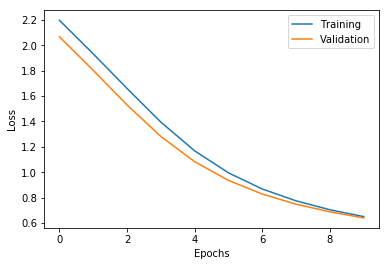

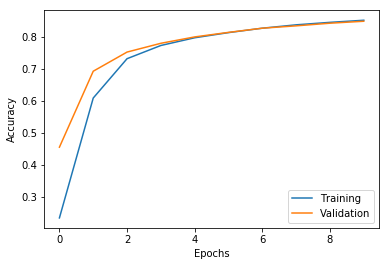

In [66]:
#let's write a helper function to make plots and avoid DRY

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

From the plots above we can see that the top accuracy we reach is ~85% let's see if we can make it better using adding regularization trough **Dropout** and a different optimizer maybe use selu as activation
- The **dropout layers** have the very specific function to *drop out* a random set of activations in that layers by setting them to zero in the forward pass. Simple as that. 

- It allows to avoid *overfitting* but has to be used **only** at training time and **not** at test time. 
```python

keras.layers.core.Dropout(rate, noise_shape=None, seed=None)
```

Applies Dropout to the input.

Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Arguments

* rate: float between 0 and 1. Fraction of the input units to drop.
* noise_shape: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape  (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features).
* seed: A Python integer to use as random seed.



In [67]:

from keras.callbacks import EarlyStopping
# early stopping helps us monitor the training process thus catching bugs or overfitting earlier 
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = Sequential()
model.add(Dense(512, activation='selu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), 
              metrics=['accuracy'])
    
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, 
          batch_size=128, verbose=True, callbacks=[early_stop]) 

Train on 48000 samples, validate on 10000 samples
Epoch 1/100
48000/48000 [==============================] - 11s - loss: 0.4585 - acc: 0.8679 - val_loss: 0.3116 - val_acc: 0.9161
Epoch 2/100
48000/48000 [==============================] - 12s - loss: 0.2501 - acc: 0.9270 - val_loss: 0.1625 - val_acc: 0.9544
Epoch 3/100
48000/48000 [==============================] - 13s - loss: 0.1682 - acc: 0.9497 - val_loss: 0.1189 - val_acc: 0.9642
Epoch 4/100
48000/48000 [==============================] - 13s - loss: 0.1330 - acc: 0.9597 - val_loss: 0.1145 - val_acc: 0.9686
Epoch 5/100
48000/48000 [==============================] - 12s - loss: 0.1139 - acc: 0.9654 - val_loss: 0.1053 - val_acc: 0.9685
Epoch 6/100
48000/48000 [==============================] - 13s - loss: 0.1002 - acc: 0.9694 - val_loss: 0.1154 - val_acc: 0.9686
Epoch 7/100
48000/48000 [==============================] - 12s - loss: 0.0906 - acc: 0.9729 - val_loss: 0.0942 - val_acc: 0.9740
Epoch 8/100
48000/48000 [======================

KeyboardInterrupt: 

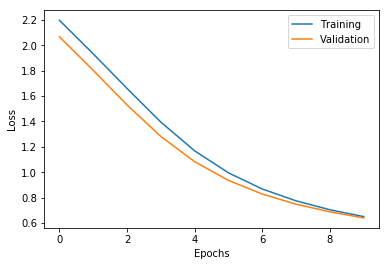

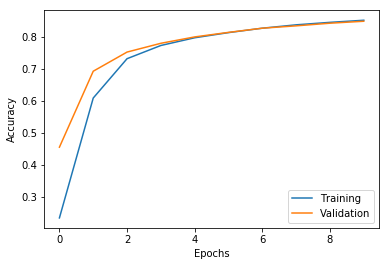

In [68]:
"""
At 13 epochs we already made a 97% accuracy showing not only 
we converge faster but also improved the overall 
accuracy and reduced overfitting
"""
plot_history(network_history)

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [75]:
#Let's see how we perform on the test set which was unseen till now
y_pred = model.predict_classes(X_test)


 9568/10000 [===========================>..] - ETA: 0s

In [80]:
accuracy_score(y_pred,y_test)

0.97660000000000002

In [81]:
# cool